# Wall-Following navigation task with mobile robot SCITOS-G5
For Each Attribute:

-- File sensor_readings_24.data:

 1. US1: ultrasound sensor at the front of the robot (reference angle: 180°) - (numeric: real)
 2. US2: ultrasound reading (reference angle: -165°) - (numeric: real)
 3. US3: ultrasound reading (reference angle: -150°) - (numeric: real)
 4. US4: ultrasound reading (reference angle: -135°) - (numeric: real)
 5. US5: ultrasound reading (reference angle: -120°) - (numeric: real)
 6. US6: ultrasound reading (reference angle: -105°) - (numeric: real)
 7. US7: ultrasound reading (reference angle: -90°) - (numeric: real)
 8. US8: ultrasound reading (reference angle: -75°) - (numeric: real)
 9. US9: ultrasound reading (reference angle: -60°) - (numeric: real)
10. US10: ultrasound reading (reference angle: -45°) - (numeric: real)
11. US11: ultrasound reading (reference angle: -30°) - (numeric: real)
12. US12: ultrasound reading (reference angle: -15°) - (numeric: real)
13. US13: reading of ultrasound sensor situated at the back of the robot (reference angle: 0°) - (numeric: real)
14. US14: ultrasound reading (reference angle: 15°) - (numeric: real)
15. US15: ultrasound reading (reference angle: 30°) - (numeric: real)
16. US16: ultrasound reading (reference angle: 45°) - (numeric: real)
17. US17: ultrasound reading (reference angle: 60°) - (numeric: real)
18. US18: ultrasound reading (reference angle: 75°) - (numeric: real)
19. US19: ultrasound reading (reference angle: 90°) - (numeric: real)
20. US20: ultrasound reading (reference angle: 105°) - (numeric: real)
21. US21: ultrasound reading (reference angle: 120°) - (numeric: real)
22. US22: ultrasound reading (reference angle: 135°) - (numeric: real)
23. US23: ultrasound reading (reference angle: 150°) - (numeric: real)
24. US24: ultrasound reading (reference angle: 165°) - (numeric: real)
   25. Class: 
          -- Move-Forward
          -- Slight-Right-Turn
          -- Sharp-Right-Turn
          -- Slight-Left-Turn

# Import Library abd Dataset

In [611]:
import pandas as pd
import numpy as np

#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")
#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,classification_report

In [612]:
df=pd.read_csv(r"C:\Users\TRUPTI\Desktop\Trupti\sensor_readings_24.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5456 non-null   float64
 1   1       5456 non-null   float64
 2   2       5456 non-null   float64
 3   3       5456 non-null   float64
 4   4       5456 non-null   float64
 5   5       5456 non-null   float64
 6   6       5456 non-null   float64
 7   7       5456 non-null   float64
 8   8       5456 non-null   float64
 9   9       5456 non-null   float64
 10  10      5456 non-null   float64
 11  11      5456 non-null   float64
 12  12      5456 non-null   float64
 13  13      5456 non-null   float64
 14  14      5456 non-null   float64
 15  15      5456 non-null   float64
 16  16      5456 non-null   float64
 17  17      5456 non-null   float64
 18  18      5456 non-null   float64
 19  19      5456 non-null   float64
 20  20      5456 non-null   float64
 21  21      5456 non-null   float64
 22  

# Basic Description of Dataframe

In [614]:
df.shape

(5456, 25)

In [615]:
df.duplicated().sum()

0

In [616]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


# EDA/Data Preprocessing

In [617]:
# ckecking for missing values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [618]:
# No missing values found

<Axes: >

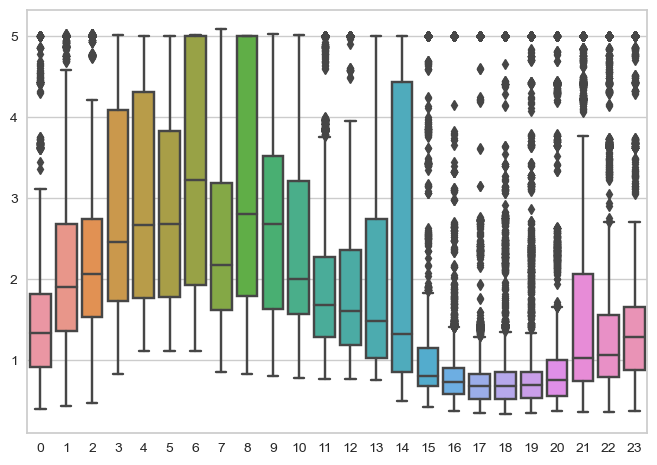

In [619]:
# Ckecking outliers
sns.boxplot(data=df)

In [620]:
# Treatment for outliers using winzorizing method

In [621]:
for i in df:
    if df[i].dtype in ("float","int"):
        q3=df[i].quantile(0.25)
        q1=df[i].quantile(0.75)
        iqr=q3-q1
        ul=q3+1.5* iqr
        ll=q1-1.5* iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

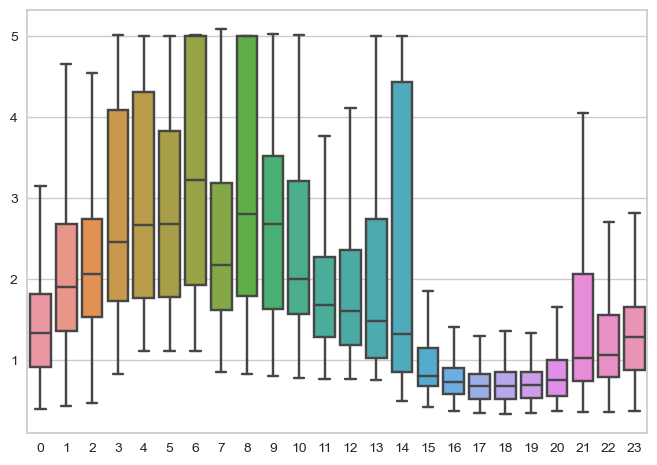

In [622]:
# After applying method
sns.boxplot(data=df)

In [623]:
# Giving name to columns

In [624]:
new_df=["US1(angle:-180°)","US2(angle:-165°)","US3(angle:-150°)","US4(angle:-135°)","US5(angle:-120°)","US6(angle:-105°)",
        "US7(angle:-90°)","US8(angle:-75°)","US9(angle:-60°)","US10(angle:-45°)","US11(angle:-30°)",
                  "US12(angle:-15°)","US13(angle:0°)","US14(angle:+15°)","US15(angle:+30°)","US16(angle:+45°)",
        "US17(angle:+60°)","US18(angle:+75°)","US19(angle:+90°)","US20(angle:+105°)","US21(angle:+120°)",
                  "US22(angle:+135°)","US23(angle:+150°)","US24(angle:+165°)","CLASS"]

In [625]:
df.columns=new_df
df.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn


# Data Visualization

<Axes: >

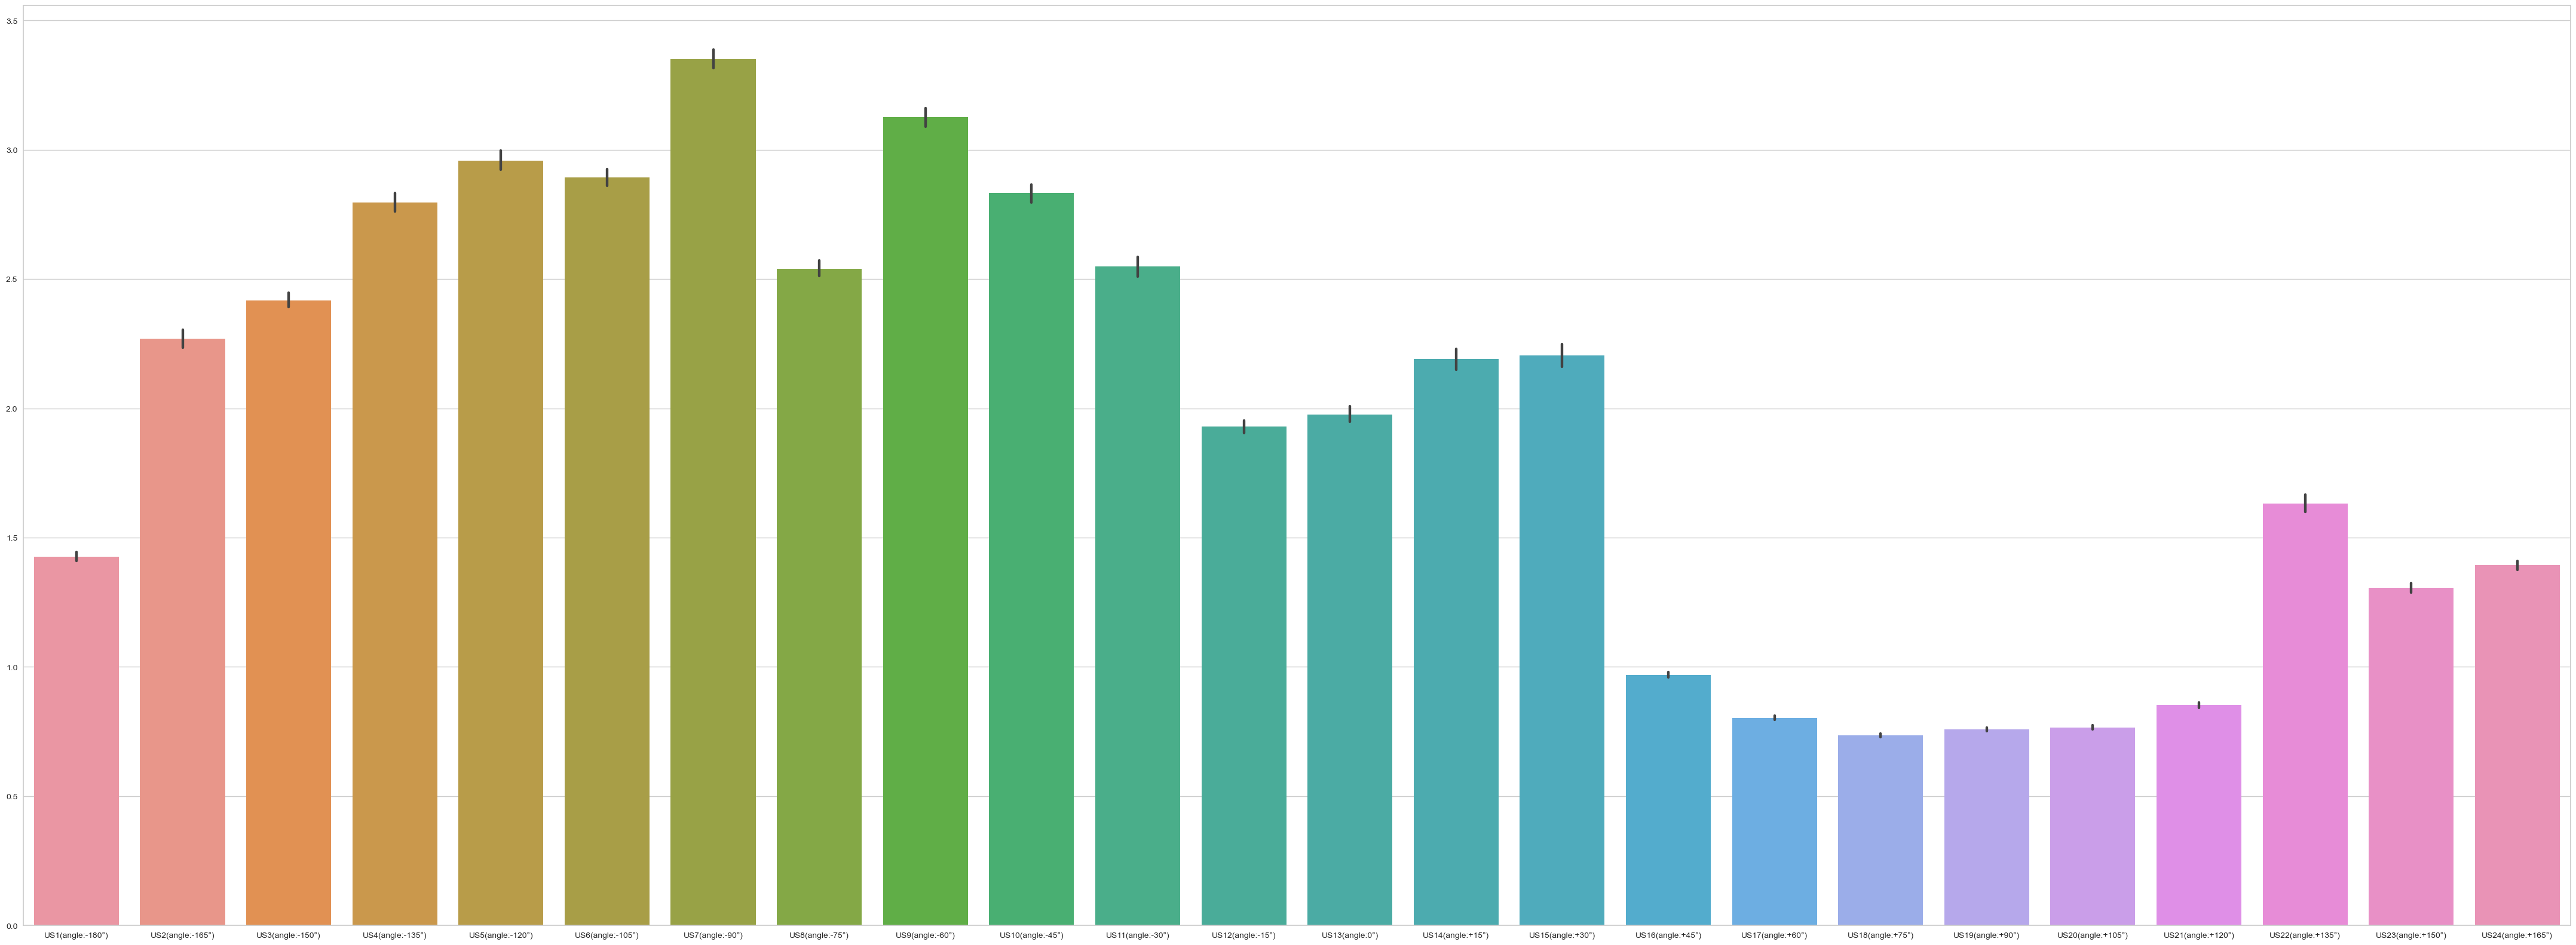

In [626]:
plt.figure(figsize =(55,20))
sns.barplot(data=df)
#plt(font_scale = 2)

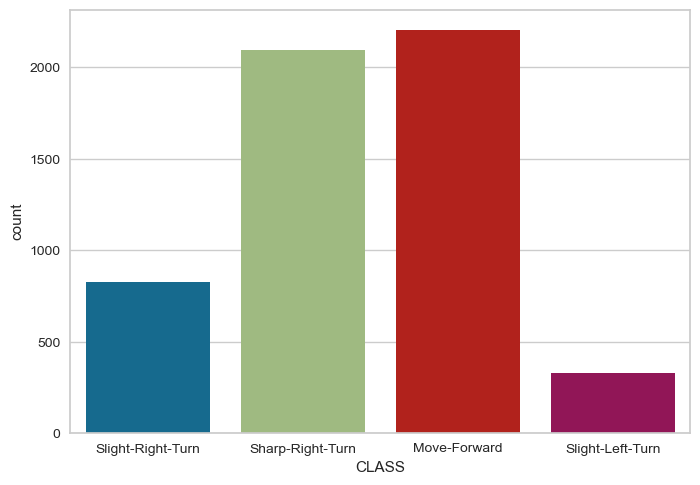

In [627]:
sns.countplot(x='CLASS',data=df)
plt.show()


In [628]:
df['CLASS'].value_counts()

CLASS
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: count, dtype: int64

In [629]:
#List with class names
class_names = ["Move-Forward",
               "Slight-Right-Turn",
               "Sharp-Right-Turn",
               "Slight-Left-Turn"]
print(class_names)

['Move-Forward', 'Slight-Right-Turn', 'Sharp-Right-Turn', 'Slight-Left-Turn']


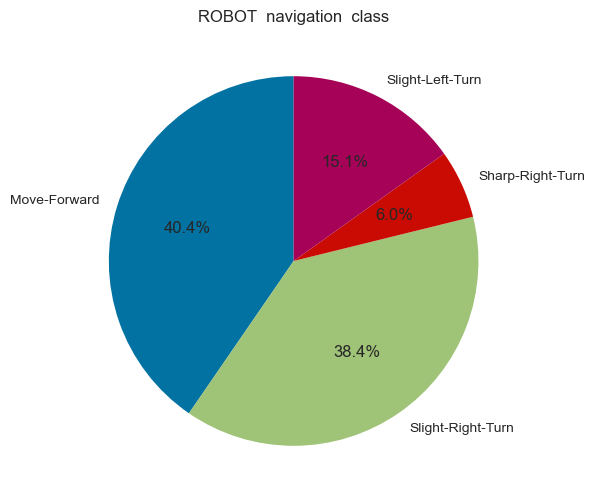

In [630]:
plt.figure(figsize=(6,6))
plt.pie(df["CLASS"].value_counts().sort_index(),labels=class_names,autopct='%1.1f%%',startangle=90)
plt.title("ROBOT  navigation  class") 
plt.show() #displaying the plot

# Data partitions

In [631]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASS', axis = 1)
Y = df[['CLASS']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

In [632]:
X_train.shape

(3819, 24)

In [633]:
X_test.shape

(1637, 24)

In [634]:
result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

# Logistics Regression Model

In [635]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logModel=LogisticRegression()
output=logModel.fit(X_train,y_train)
Lrpred=logModel.predict(X_train)


In [636]:
lg_train=pd.concat([X_train,y_train],axis=1)
lg_train.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
3948,1.757,2.44600,2.636,2.712,5.000,3.837,3.224,2.765,2.754,2.756,...,0.777,0.790,0.905000,0.808,0.791000,0.910,0.956,2.71075,2.817125,Sharp-Right-Turn
1067,1.304,4.66075,1.859,1.870,3.195,3.194,5.000,3.934,5.000,5.000,...,0.580,0.499,0.495000,0.508,0.675000,1.041,1.328,1.30300,1.295000,Move-Forward
771,1.809,1.83200,1.856,2.860,2.027,1.984,2.014,2.027,1.935,2.178,...,1.679,1.411,1.297875,1.358,1.344875,0.596,0.901,1.81500,1.802000,Slight-Left-Turn


In [637]:
lg_train['Predicted']=logModel.predict(X_train)
lg_train.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS,Predicted
3948,1.757,2.44600,2.636,2.712,5.000,3.837,3.224,2.765,2.754,2.756,...,0.790,0.905000,0.808,0.791000,0.910,0.956,2.71075,2.817125,Sharp-Right-Turn,Sharp-Right-Turn
1067,1.304,4.66075,1.859,1.870,3.195,3.194,5.000,3.934,5.000,5.000,...,0.499,0.495000,0.508,0.675000,1.041,1.328,1.30300,1.295000,Move-Forward,Move-Forward
771,1.809,1.83200,1.856,2.860,2.027,1.984,2.014,2.027,1.935,2.178,...,1.411,1.297875,1.358,1.344875,0.596,0.901,1.81500,1.802000,Slight-Left-Turn,Slight-Left-Turn


In [638]:
from sklearn.metrics import confusion_matrix,classification_report
train_matrix=confusion_matrix(lg_train['Predicted'],lg_train['CLASS'])
print(train_matrix)

[[1150  235    9  112]
 [ 316 1123   26  123]
 [  12   21  205    1]
 [  64   67    0  355]]


In [639]:
print(classification_report(lg_train['Predicted'],lg_train['CLASS']))

                   precision    recall  f1-score   support

     Move-Forward       0.75      0.76      0.75      1506
 Sharp-Right-Turn       0.78      0.71      0.74      1588
 Slight-Left-Turn       0.85      0.86      0.86       239
Slight-Right-Turn       0.60      0.73      0.66       486

         accuracy                           0.74      3819
        macro avg       0.74      0.76      0.75      3819
     weighted avg       0.75      0.74      0.74      3819



In [640]:
#Logistics test Model

In [641]:
lg_test=pd.concat([X_test,y_test],axis=1)
lg_test.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
3342,1.488,2.750,2.883,2.910,5.000,5.000,1.56,1.528,1.516,1.526,...,0.780,0.803,1.161,0.761,0.743,0.734,0.742,0.766,0.795,Sharp-Right-Turn
5247,0.862,0.889,1.659,1.633,1.626,1.634,5.00,1.669,2.429,2.994,...,0.658,0.646,0.643,0.738,0.683,0.863,0.846,0.835,0.844,Move-Forward
3363,0.733,0.757,0.803,2.064,2.918,5.000,5.00,1.615,5.000,1.556,...,0.749,0.737,0.743,0.769,1.078,0.733,0.717,0.705,0.711,Move-Forward


In [642]:
lg_test['Predicted']=logModel.predict(X_test)
lg_test.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS,Predicted
3342,1.488,2.750,2.883,2.910,5.000,5.000,1.56,1.528,1.516,1.526,...,0.803,1.161,0.761,0.743,0.734,0.742,0.766,0.795,Sharp-Right-Turn,Sharp-Right-Turn
5247,0.862,0.889,1.659,1.633,1.626,1.634,5.00,1.669,2.429,2.994,...,0.646,0.643,0.738,0.683,0.863,0.846,0.835,0.844,Move-Forward,Move-Forward
3363,0.733,0.757,0.803,2.064,2.918,5.000,5.00,1.615,5.000,1.556,...,0.737,0.743,0.769,1.078,0.733,0.717,0.705,0.711,Move-Forward,Move-Forward


In [643]:
from sklearn.metrics import confusion_matrix,classification_report
test_matrix=confusion_matrix(lg_test['Predicted'],lg_test['CLASS'])
print(train_matrix)

[[1150  235    9  112]
 [ 316 1123   26  123]
 [  12   21  205    1]
 [  64   67    0  355]]


In [644]:
print(classification_report(lg_test['Predicted'],lg_test['CLASS']))

                   precision    recall  f1-score   support

     Move-Forward       0.75      0.72      0.73       693
 Sharp-Right-Turn       0.73      0.73      0.73       651
 Slight-Left-Turn       0.90      0.86      0.88        92
Slight-Right-Turn       0.59      0.69      0.64       201

         accuracy                           0.73      1637
        macro avg       0.74      0.75      0.75      1637
     weighted avg       0.73      0.73      0.73      1637



In [645]:
lg_train_acc=accuracy_score(lg_train['Predicted'],lg_train['CLASS'])
lg_test_acc=accuracy_score(lg_test['Predicted'],lg_test['CLASS'])

In [646]:
result = result._append(pd.Series({'Model':'Logistics Regression','Train Accuracy':lg_train_acc,'Test Accuracy':lg_test_acc}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383


# KNN Classifier Model

In [647]:
# applying Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_traink = scaler.transform(X_train)
X_testk = scaler.transform(X_test)


In [648]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_traink, y_train)
y_pred = knnclassifier.predict(X_testk)

In [649]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_traink))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_testk))

result = result._append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383
1,KNN Classifier,0.923802,0.893708


In [650]:
print(classification_report(knnclassifier.predict(X_traink),y_train['CLASS']))

                   precision    recall  f1-score   support

     Move-Forward       0.93      0.91      0.92      1581
 Sharp-Right-Turn       0.93      0.93      0.93      1436
 Slight-Left-Turn       0.92      0.97      0.95       227
Slight-Right-Turn       0.89      0.92      0.91       575

         accuracy                           0.92      3819
        macro avg       0.92      0.93      0.93      3819
     weighted avg       0.92      0.92      0.92      3819



In [651]:
print(classification_report(y_pred,y_test['CLASS']))

                   precision    recall  f1-score   support

     Move-Forward       0.92      0.87      0.89       701
 Sharp-Right-Turn       0.89      0.93      0.91       626
 Slight-Left-Turn       0.95      0.97      0.96        87
Slight-Right-Turn       0.81      0.85      0.83       223

         accuracy                           0.89      1637
        macro avg       0.89      0.90      0.90      1637
     weighted avg       0.89      0.89      0.89      1637



# Decision Tree Model

In [652]:
DTtrain=pd.concat([X_train,y_train],axis=1)

In [653]:
DTtrain.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
3948,1.757,2.44600,2.636,2.712,5.000,3.837,3.224,2.765,2.754,2.756,...,0.777,0.790,0.905000,0.808,0.791000,0.910,0.956,2.71075,2.817125,Sharp-Right-Turn
1067,1.304,4.66075,1.859,1.870,3.195,3.194,5.000,3.934,5.000,5.000,...,0.580,0.499,0.495000,0.508,0.675000,1.041,1.328,1.30300,1.295000,Move-Forward
771,1.809,1.83200,1.856,2.860,2.027,1.984,2.014,2.027,1.935,2.178,...,1.679,1.411,1.297875,1.358,1.344875,0.596,0.901,1.81500,1.802000,Slight-Left-Turn


In [654]:
# Decision Tree Model

In [655]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [656]:
# Model prunning


In [657]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=100, #parent 
                                 max_depth=5)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)

In [658]:
# Model Pronning using Grid search method

In [659]:
params = { 'min_samples_split': [100,150,200,50], ## Parent 
           'min_samples_leaf': [60,70,90,100,50], ## Child or Leave 
           'max_depth':[3,4,5]}  # Branches

In [660]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [60, 70, 90, 100, 50],
                         'min_samples_split': [100, 150, 200, 50]},
             verbose=1)

In [661]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

In [662]:
independent_variable = list(X_train.columns[1:])
independent_variable

['US2(angle:-165°)',
 'US3(angle:-150°)',
 'US4(angle:-135°)',
 'US5(angle:-120°)',
 'US6(angle:-105°)',
 'US7(angle:-90°)',
 'US8(angle:-75°)',
 'US9(angle:-60°)',
 'US10(angle:-45°)',
 'US11(angle:-30°)',
 'US12(angle:-15°)',
 'US13(angle:0°)',
 'US14(angle:+15°)',
 'US15(angle:+30°)',
 'US16(angle:+45°)',
 'US17(angle:+60°)',
 'US18(angle:+75°)',
 'US19(angle:+90°)',
 'US20(angle:+105°)',
 'US21(angle:+120°)',
 'US22(angle:+135°)',
 'US23(angle:+150°)',
 'US24(angle:+165°)']

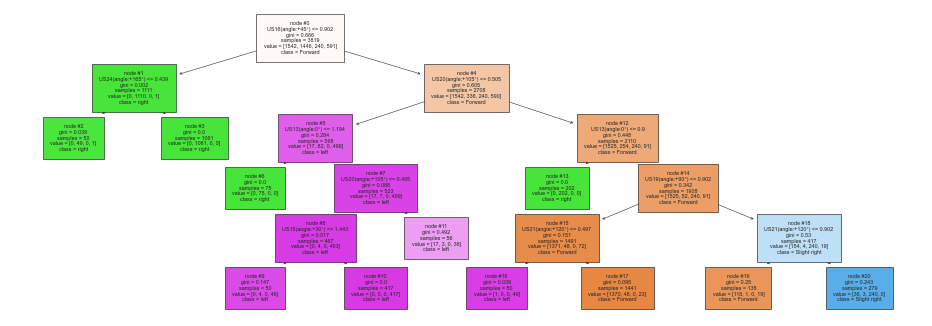

In [663]:
from sklearn import tree
import matplotlib.pyplot as plt

CLASS=['Forward','right','Slight right','left'] # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,3), dpi=130)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = CLASS, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 
#fig.savefig('imagename.png')

In [664]:
# Predictions on Train Dataset

In [665]:
DTtrain.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
3948,1.757,2.44600,2.636,2.712,5.000,3.837,3.224,2.765,2.754,2.756,...,0.777,0.790,0.905000,0.808,0.791000,0.910,0.956,2.71075,2.817125,Sharp-Right-Turn
1067,1.304,4.66075,1.859,1.870,3.195,3.194,5.000,3.934,5.000,5.000,...,0.580,0.499,0.495000,0.508,0.675000,1.041,1.328,1.30300,1.295000,Move-Forward
771,1.809,1.83200,1.856,2.860,2.027,1.984,2.014,2.027,1.935,2.178,...,1.679,1.411,1.297875,1.358,1.344875,0.596,0.901,1.81500,1.802000,Slight-Left-Turn


In [666]:
DTtrain['Predicted']=dt.predict(X_train)
DTtrain.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS,Predicted
3948,1.757,2.44600,2.636,2.712,5.000,3.837,3.224,2.765,2.754,2.756,...,0.790,0.905000,0.808,0.791000,0.910,0.956,2.71075,2.817125,Sharp-Right-Turn,Sharp-Right-Turn
1067,1.304,4.66075,1.859,1.870,3.195,3.194,5.000,3.934,5.000,5.000,...,0.499,0.495000,0.508,0.675000,1.041,1.328,1.30300,1.295000,Move-Forward,Move-Forward
771,1.809,1.83200,1.856,2.860,2.027,1.984,2.014,2.027,1.935,2.178,...,1.411,1.297875,1.358,1.344875,0.596,0.901,1.81500,1.802000,Slight-Left-Turn,Slight-Left-Turn


# Decision Tree Model Performance Metrics

In [667]:
# Train model

In [668]:
from sklearn.metrics import classification_report,confusion_matrix
DTMatrix = confusion_matrix(DTtrain['Predicted'],DTtrain['CLASS'])
print(DTMatrix)

[[1488   49    0   42]
 [   0 1387    0    1]
 [  36    3  240    0]
 [  18    7    0  548]]


In [669]:
tree1=classification_report(DTtrain['Predicted'],DTtrain['CLASS'])
print(tree1)

                   precision    recall  f1-score   support

     Move-Forward       0.96      0.94      0.95      1579
 Sharp-Right-Turn       0.96      1.00      0.98      1388
 Slight-Left-Turn       1.00      0.86      0.92       279
Slight-Right-Turn       0.93      0.96      0.94       573

         accuracy                           0.96      3819
        macro avg       0.96      0.94      0.95      3819
     weighted avg       0.96      0.96      0.96      3819



In [670]:
# D.T. Model Performance metrices
# Test model

In [671]:
DTtest=pd.concat([X_test,y_test],axis=1)
DTtest.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
3342,1.488,2.750,2.883,2.910,5.000,5.000,1.56,1.528,1.516,1.526,...,0.780,0.803,1.161,0.761,0.743,0.734,0.742,0.766,0.795,Sharp-Right-Turn
5247,0.862,0.889,1.659,1.633,1.626,1.634,5.00,1.669,2.429,2.994,...,0.658,0.646,0.643,0.738,0.683,0.863,0.846,0.835,0.844,Move-Forward
3363,0.733,0.757,0.803,2.064,2.918,5.000,5.00,1.615,5.000,1.556,...,0.749,0.737,0.743,0.769,1.078,0.733,0.717,0.705,0.711,Move-Forward


In [672]:
DTtest['Predicted']=dt.predict(X_test)
DTtest.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS,Predicted
3342,1.488,2.750,2.883,2.910,5.000,5.000,1.56,1.528,1.516,1.526,...,0.803,1.161,0.761,0.743,0.734,0.742,0.766,0.795,Sharp-Right-Turn,Sharp-Right-Turn
5247,0.862,0.889,1.659,1.633,1.626,1.634,5.00,1.669,2.429,2.994,...,0.646,0.643,0.738,0.683,0.863,0.846,0.835,0.844,Move-Forward,Move-Forward
3363,0.733,0.757,0.803,2.064,2.918,5.000,5.00,1.615,5.000,1.556,...,0.737,0.743,0.769,1.078,0.733,0.717,0.705,0.711,Move-Forward,Move-Forward


In [673]:
print(confusion_matrix(DTtest['Predicted'],DTtest['CLASS']))

[[644  18   0  22]
 [  0 629   0   0]
 [ 14   0  88   0]
 [  5   4   0 213]]


In [674]:
tree=classification_report(DTtest['Predicted'],DTtest['CLASS'])
print(tree)

                   precision    recall  f1-score   support

     Move-Forward       0.97      0.94      0.96       684
 Sharp-Right-Turn       0.97      1.00      0.98       629
 Slight-Left-Turn       1.00      0.86      0.93       102
Slight-Right-Turn       0.91      0.96      0.93       222

         accuracy                           0.96      1637
        macro avg       0.96      0.94      0.95      1637
     weighted avg       0.96      0.96      0.96      1637



In [675]:
dt_train_accuracy_score = accuracy_score(DTtest['Predicted'],DTtest['CLASS'])
dt_test_accuracy_score = accuracy_score(DTtest['Predicted'],DTtest['CLASS'])

In [676]:
result = result._append(pd.Series({'Model':'Decision Tree with Prunning','Train Accuracy':dt_train_accuracy_score,'Test Accuracy':dt_test_accuracy_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383
1,KNN Classifier,0.923802,0.893708
2,Decision Tree with Prunning,0.961515,0.961515


# Randon Forest Model

In [677]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=150, # make 20 tress
                               criterion="gini",
                               max_depth=5,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=150)

In [678]:
# Important Feature Selection


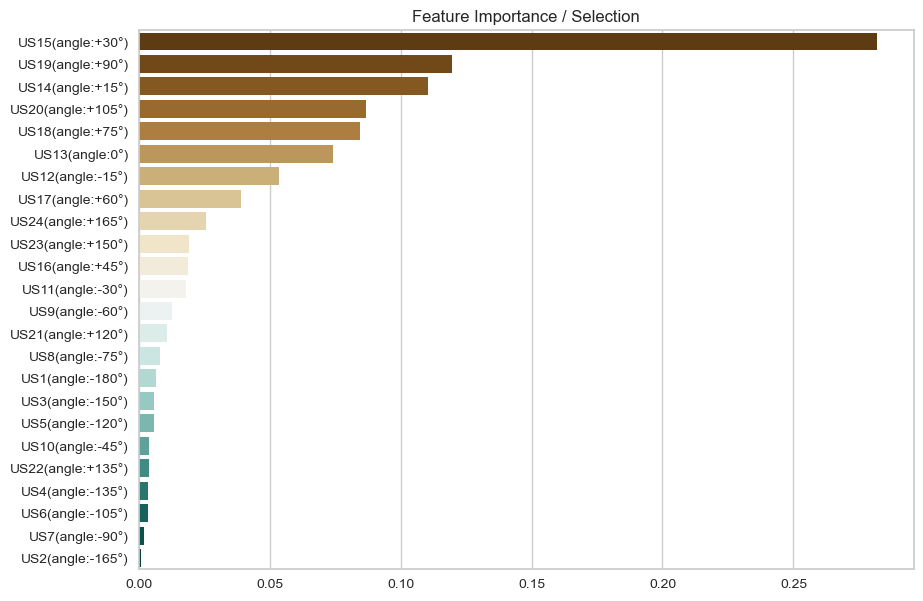

In [679]:
#Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


In [680]:
from sklearn.tree import export_graphviz
import pydot

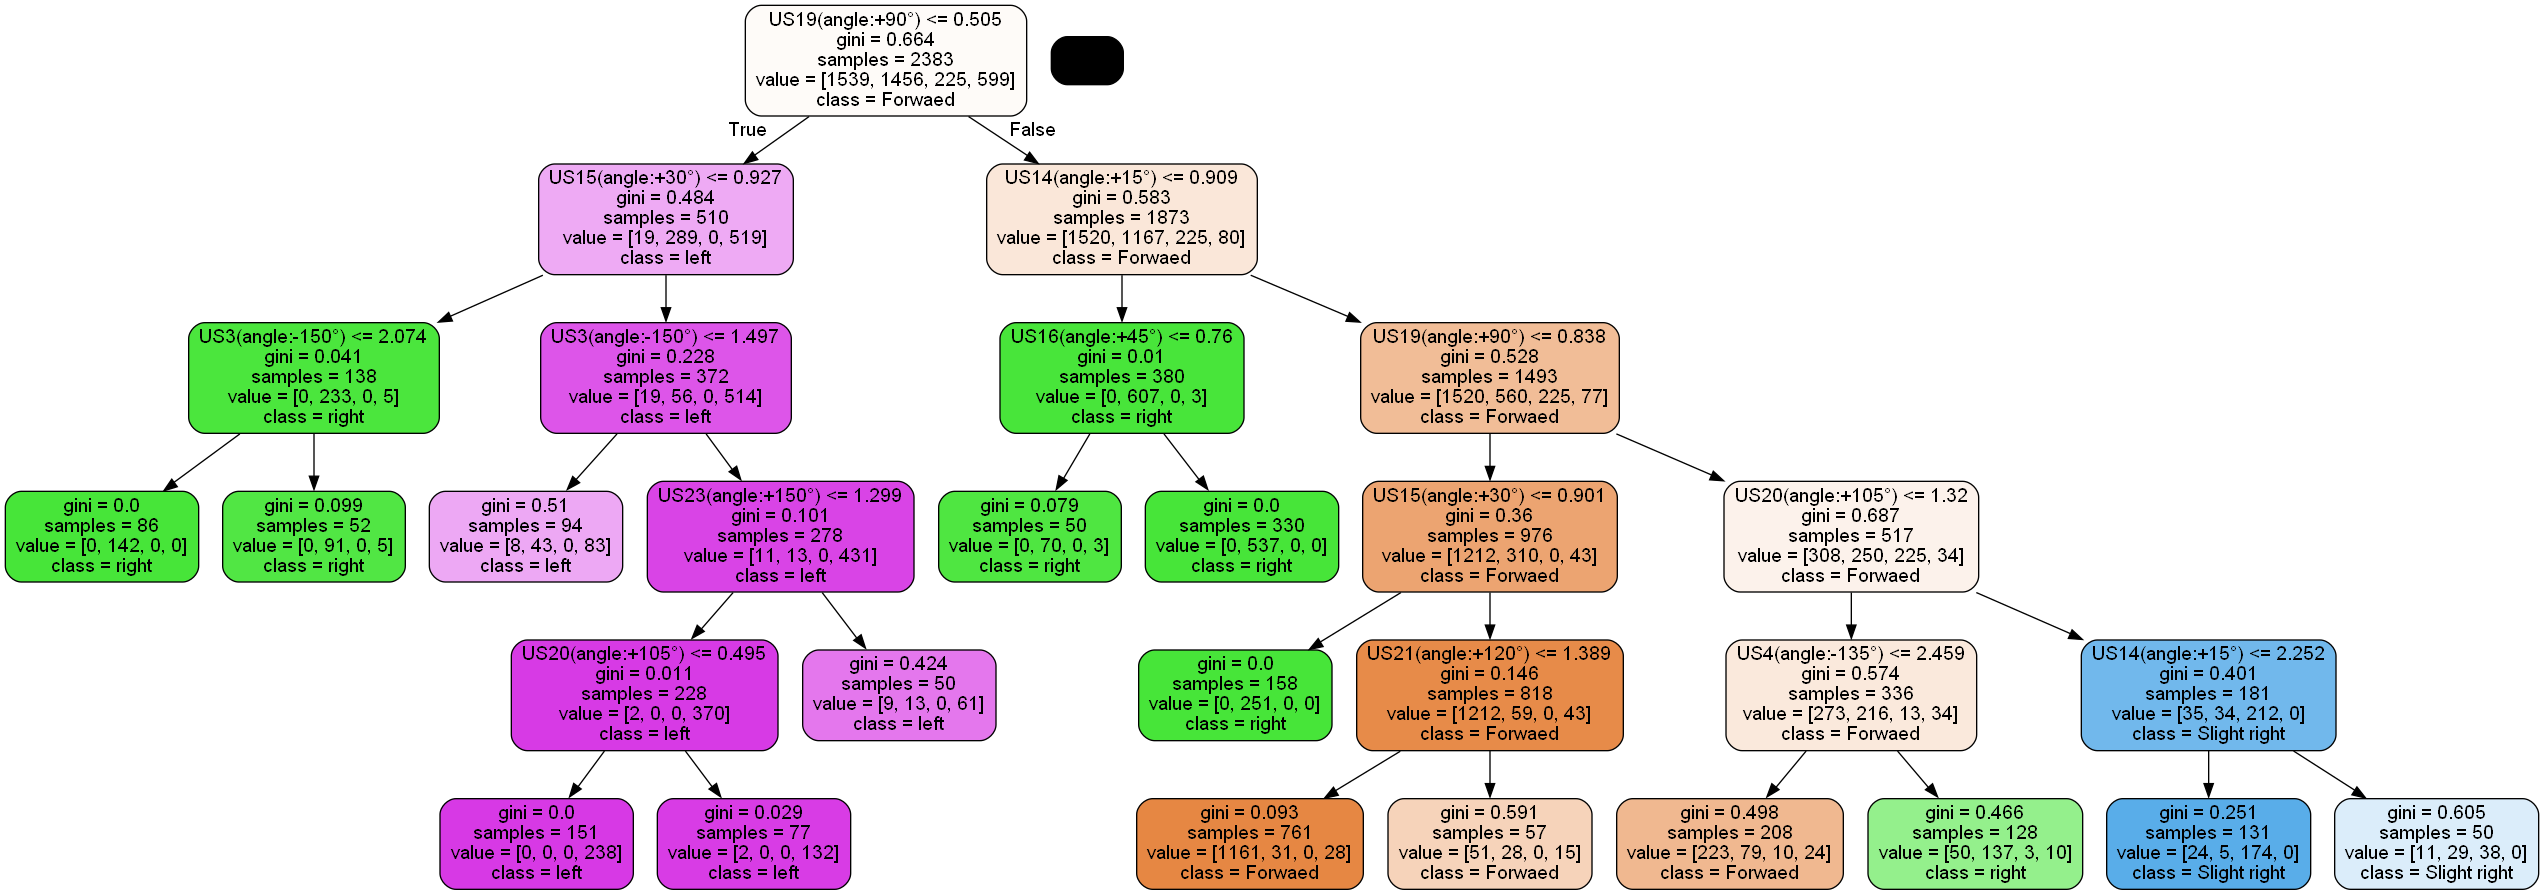

In [681]:
feature_list = list(X.columns)  # all independent variable name
CLASS = ['Forwaed','right','Slight right','left'] 

tree = Model.estimators_[25]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot',   # export file
                feature_names = feature_list, 
                class_names = CLASS,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')   # import file then make graph
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

In [682]:
# Train Model

In [683]:
RFtrain = pd.concat([X_train,y_train],axis=1)
RFtrain.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
3948,1.757,2.44600,2.636,2.712,5.000,3.837,3.224,2.765,2.754,2.756,...,0.777,0.790,0.905000,0.808,0.791000,0.910,0.956,2.71075,2.817125,Sharp-Right-Turn
1067,1.304,4.66075,1.859,1.870,3.195,3.194,5.000,3.934,5.000,5.000,...,0.580,0.499,0.495000,0.508,0.675000,1.041,1.328,1.30300,1.295000,Move-Forward
771,1.809,1.83200,1.856,2.860,2.027,1.984,2.014,2.027,1.935,2.178,...,1.679,1.411,1.297875,1.358,1.344875,0.596,0.901,1.81500,1.802000,Slight-Left-Turn


In [684]:
RFtrain['Predicted'] = Model.predict(X_train)
RFtrain.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS,Predicted
3948,1.757,2.44600,2.636,2.712,5.000,3.837,3.224,2.765,2.754,2.756,...,0.790,0.905000,0.808,0.791000,0.910,0.956,2.71075,2.817125,Sharp-Right-Turn,Sharp-Right-Turn
1067,1.304,4.66075,1.859,1.870,3.195,3.194,5.000,3.934,5.000,5.000,...,0.499,0.495000,0.508,0.675000,1.041,1.328,1.30300,1.295000,Move-Forward,Move-Forward
771,1.809,1.83200,1.856,2.860,2.027,1.984,2.014,2.027,1.935,2.178,...,1.411,1.297875,1.358,1.344875,0.596,0.901,1.81500,1.802000,Slight-Left-Turn,Slight-Left-Turn


In [685]:
# Model Performance Metrics

In [686]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(RFtrain['Predicted'],RFtrain['CLASS'])
print(confusion_matrix)

[[1525    7   27   88]
 [   4 1439    3    3]
 [   6    0  210    0]
 [   7    0    0  500]]


In [687]:
from sklearn.metrics import classification_report
print(classification_report(RFtrain['CLASS'], RFtrain['Predicted']))

                   precision    recall  f1-score   support

     Move-Forward       0.93      0.99      0.96      1542
 Sharp-Right-Turn       0.99      1.00      0.99      1446
 Slight-Left-Turn       0.97      0.88      0.92       240
Slight-Right-Turn       0.99      0.85      0.91       591

         accuracy                           0.96      3819
        macro avg       0.97      0.93      0.95      3819
     weighted avg       0.96      0.96      0.96      3819



# Predictions on Test Dataset

In [688]:
RFtest=pd.concat([X_test,y_test],axis=1)
RFtest.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
3342,1.488,2.750,2.883,2.910,5.000,5.000,1.56,1.528,1.516,1.526,...,0.780,0.803,1.161,0.761,0.743,0.734,0.742,0.766,0.795,Sharp-Right-Turn
5247,0.862,0.889,1.659,1.633,1.626,1.634,5.00,1.669,2.429,2.994,...,0.658,0.646,0.643,0.738,0.683,0.863,0.846,0.835,0.844,Move-Forward
3363,0.733,0.757,0.803,2.064,2.918,5.000,5.00,1.615,5.000,1.556,...,0.749,0.737,0.743,0.769,1.078,0.733,0.717,0.705,0.711,Move-Forward


In [689]:
RFtest['predicted']=Model.predict(X_test)
RFtest.head(3)

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS,predicted
3342,1.488,2.750,2.883,2.910,5.000,5.000,1.56,1.528,1.516,1.526,...,0.803,1.161,0.761,0.743,0.734,0.742,0.766,0.795,Sharp-Right-Turn,Sharp-Right-Turn
5247,0.862,0.889,1.659,1.633,1.626,1.634,5.00,1.669,2.429,2.994,...,0.646,0.643,0.738,0.683,0.863,0.846,0.835,0.844,Move-Forward,Move-Forward
3363,0.733,0.757,0.803,2.064,2.918,5.000,5.00,1.615,5.000,1.556,...,0.737,0.743,0.769,1.078,0.733,0.717,0.705,0.711,Move-Forward,Move-Forward


In [690]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(RFtest['predicted'],RFtest['CLASS'])
print(confusion_matrix)

[[656   3   2  38]
 [  3 648   0   3]
 [  3   0  86   0]
 [  1   0   0 194]]


In [691]:
print(classification_report(RFtest['predicted'],RFtest['CLASS']))

                   precision    recall  f1-score   support

     Move-Forward       0.99      0.94      0.96       699
 Sharp-Right-Turn       1.00      0.99      0.99       654
 Slight-Left-Turn       0.98      0.97      0.97        89
Slight-Right-Turn       0.83      0.99      0.90       195

         accuracy                           0.97      1637
        macro avg       0.95      0.97      0.96      1637
     weighted avg       0.97      0.97      0.97      1637



In [692]:
rf_train_acc=accuracy_score(RFtrain['Predicted'],RFtrain['CLASS'])
rf_test_acc=accuracy_score(RFtest['predicted'],RFtest['CLASS'])

In [693]:
result=result._append(pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_acc,'Test Accuracy':rf_test_acc}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383
1,KNN Classifier,0.923802,0.893708
2,Decision Tree with Prunning,0.961515,0.961515
3,Random Forest Classifier,0.962032,0.967624


# PCA (Principal Components Analysis)

In [694]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train , test_size=0.3, random_state=10)

In [695]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [696]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train1)

pca.n_components_

23

In [697]:
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

# Logistic Regression with PCA

In [698]:
from sklearn.linear_model import LogisticRegression
lgpclassifier = LogisticRegression(C=10,random_state = 0) 
lgpclassifier.fit(X_train1, y_train1) 
y_pred_train1 = lgpclassifier.predict(X_train1)
y_pred_test1 = lgpclassifier.predict(X_test1)

In [699]:
print(classification_report(y_pred_test1,y_test1))

                   precision    recall  f1-score   support

     Move-Forward       0.74      0.73      0.73       444
 Sharp-Right-Turn       0.76      0.75      0.75       486
 Slight-Left-Turn       0.91      0.90      0.91        71
Slight-Right-Turn       0.61      0.67      0.64       145

         accuracy                           0.74      1146
        macro avg       0.75      0.76      0.76      1146
     weighted avg       0.74      0.74      0.74      1146



In [700]:
lgp_train_accuracy = accuracy_score(y_train1,y_pred_train1)
lgp_test_accuracy = accuracy_score(y_test1,y_pred_test1)
#print(lgp_train_accuracy,knnp_test_accuracy)
result = result._append(pd.Series({'Model':'Logestic Regression PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383
1,KNN Classifier,0.923802,0.893708
2,Decision Tree with Prunning,0.961515,0.961515
3,Random Forest Classifier,0.962032,0.967624
4,Logestic Regression PCA,0.744108,0.738220


# KNN Classifier with PCA 


In [701]:
classifier = KNeighborsClassifier()
classifier.fit(X_train1, y_train1)
Y_pred = classifier.predict(X_test1)

In [702]:
print(classification_report(Y_pred,y_test1))

                   precision    recall  f1-score   support

     Move-Forward       0.89      0.82      0.85       473
 Sharp-Right-Turn       0.85      0.90      0.87       454
 Slight-Left-Turn       0.86      0.91      0.88        66
Slight-Right-Turn       0.84      0.88      0.86       153

         accuracy                           0.86      1146
        macro avg       0.86      0.88      0.87      1146
     weighted avg       0.86      0.86      0.86      1146



In [703]:
knnp_train_accuracy = accuracy_score(y_train1,classifier.predict(X_train1))
knnp_test_accuracy = accuracy_score(y_test1,Y_pred)
#print(knnp_train_accuracy,knnp_test_accuracy)
result = result._append(pd.Series({'Model':'KNN with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383
1,KNN Classifier,0.923802,0.893708
2,Decision Tree with Prunning,0.961515,0.961515
3,Random Forest Classifier,0.962032,0.967624
4,Logestic Regression PCA,0.744108,0.738220
5,KNN with PCA,0.906472,0.863002


# Decision Tree Classifier with PCA

In [704]:
from sklearn.tree import DecisionTreeClassifier 
dtpclassifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=5,min_samples_leaf=50, min_samples_split=100)
dtpclassifier.fit(X_train1, y_train1) 
y_pred_test = dtpclassifier.predict(X_test1)
y_pred_train = dtpclassifier.predict(X_train1)

In [705]:
dtp_train_recall_score = recall_score(y_train1, y_pred_train, average='weighted')
dtp_test_recall_score = recall_score(y_test1, y_pred_test, average='weighted')

dtp_train_accuracy_score = accuracy_score(y_train1, y_pred_train)
dtp_test_accuracy_score = accuracy_score(y_test1, y_pred_test)
result = result._append(pd.Series({'Model':'Decision Tree with PCA','Train Accuracy':dtp_train_accuracy_score,'Test Accuracy':dtp_test_accuracy_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383
1,KNN Classifier,0.923802,0.893708
2,Decision Tree with Prunning,0.961515,0.961515
3,Random Forest Classifier,0.962032,0.967624
4,Logestic Regression PCA,0.744108,0.738220
5,KNN with PCA,0.906472,0.863002
6,Decision Tree with PCA,0.720165,0.682373


# Random Forest with PCA

In [706]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier(n_estimators=50, criterion='gini',max_features=150,max_depth=4,max_leaf_nodes=50)
rfp_clf.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=4, max_features=150, max_leaf_nodes=50,
                       n_estimators=50)

In [707]:
y_pred_train1 = rfp_clf.predict(X_train1)
y_pred_test1 = rfp_clf.predict(X_test1)
rfp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
rfp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)

In [708]:
result = result._append(pd.Series({'Model':'Random Forest with PCA','Train Accuracy':rfp_train_accuracy_score,'Test Accuracy':rfp_test_accuracy_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,Logistics Regression,0.741817,0.729383
1,KNN Classifier,0.923802,0.893708
2,Decision Tree with Prunning,0.961515,0.961515
3,Random Forest Classifier,0.962032,0.967624
4,Logestic Regression PCA,0.744108,0.738220
5,KNN with PCA,0.906472,0.863002
6,Decision Tree with PCA,0.720165,0.682373
7,Random Forest with PCA,0.785634,0.741710


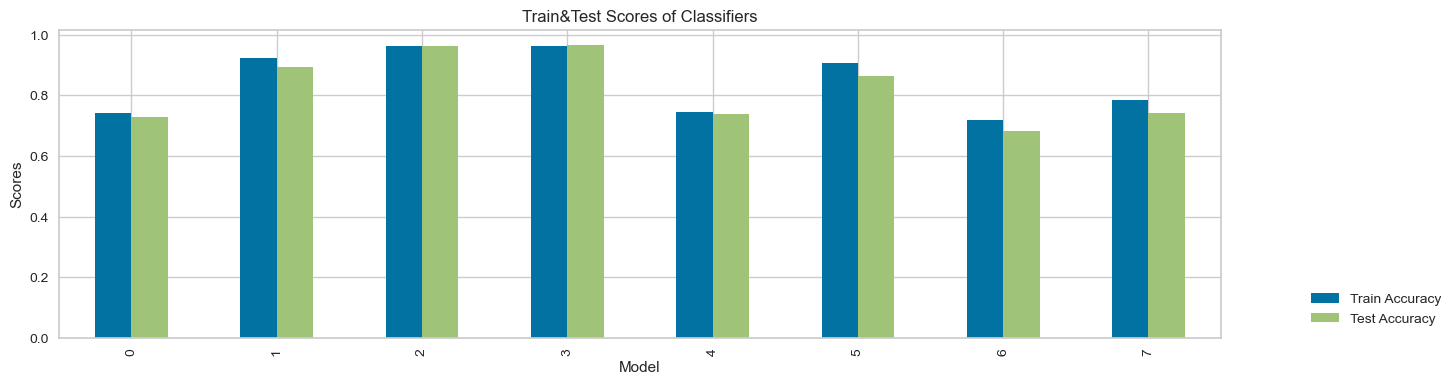

In [709]:
result.plot(kind="bar",figsize=(15,4))
plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

# Conclusion:
Result: Four types of movement applied which are common in rob0t farward classfied using machine learning algorithms like RandomForest , DecisionTree classification,KNN Classifier and Logistric Regression Algorithms. we obtained the maximum accuracy with KNN Classifier.we found out that KNN Classifier Algorithms is most suitable for working with sequence data out of other four algorithms. The models started performing worst after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables.

# `Unsupervised Learning Model

# Clustering

In [710]:
X.head()

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US15(angle:+30°),US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°)
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,1.744,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429


In [711]:
cluster=X

In [712]:
sample=cluster.values
sample

array([[0.438   , 0.498   , 3.625   , ..., 0.444   , 0.44    , 0.429   ],
       [0.438   , 0.498   , 3.625   , ..., 0.444   , 0.443   , 0.429   ],
       [0.438   , 0.498   , 3.625   , ..., 0.444   , 0.446   , 0.429   ],
       ...,
       [0.937   , 4.66075 , 4.034   , ..., 4.056125, 2.71075 , 1.105   ],
       [0.945   , 4.052   , 4.052   , ..., 4.056125, 2.71075 , 1.118   ],
       [0.95    , 4.066   , 4.54    , ..., 4.056125, 2.71075 , 1.168   ]])

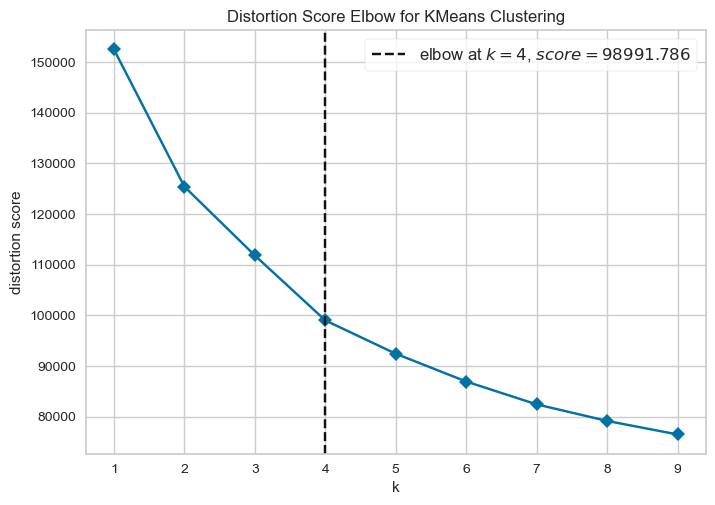

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [713]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(sample)        # Fit the data to the visualizer
visualizer.show()

# Model

In [714]:
model2 = KMeans(n_clusters=4,max_iter=100,random_state=42)

In [715]:
cluster['Cluster_Made'] = model2.fit_predict(sample)
cluster.head()

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),Cluster_Made
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,1
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,1
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,1
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,1
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,1


In [716]:
cluster.Cluster_Made.value_counts(ascending=False)

Cluster_Made
1    1867
0    1459
3    1088
2    1042
Name: count, dtype: int64

In [717]:
# After Applying K-Clustering it creates 4 cluster which is as per navigation Class classifications.

# Export model

In [718]:
import pickle

pickle.dump(knnclassifier, open(r'C:\Users\TRUPTI\Desktop\Trupti\build.pkl','wb'))  # Exporting model from python to laptop